Text(0.5, 1.0, 'Median Filter Err Map')

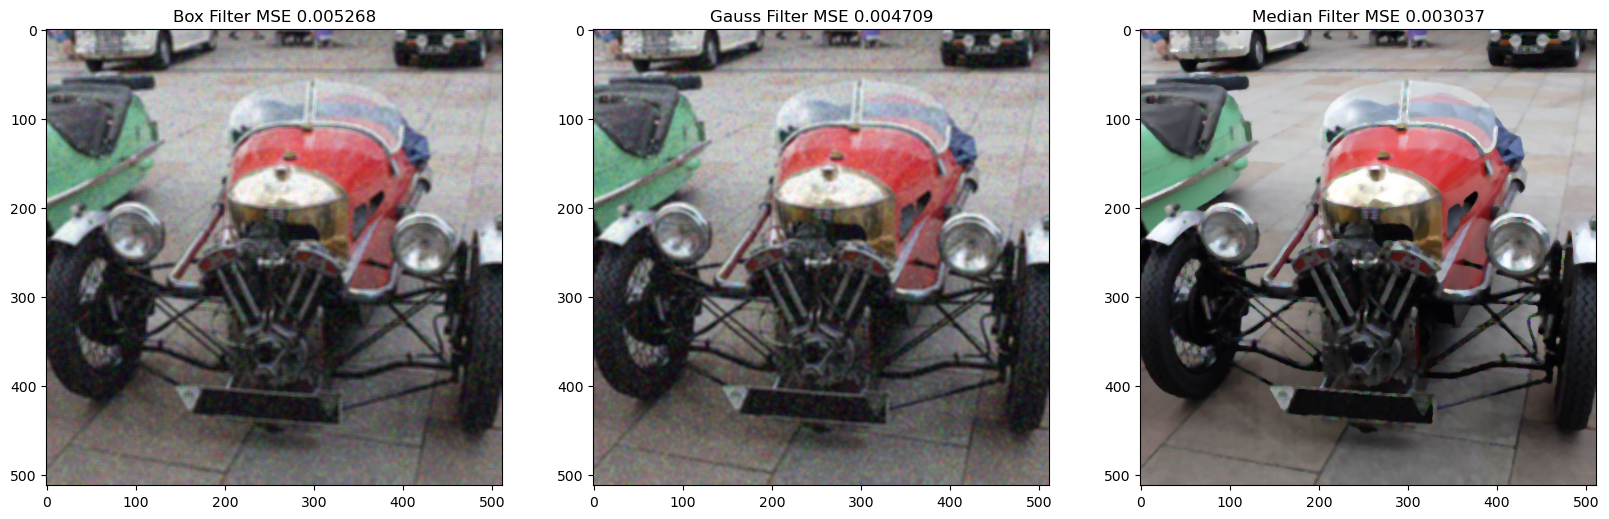

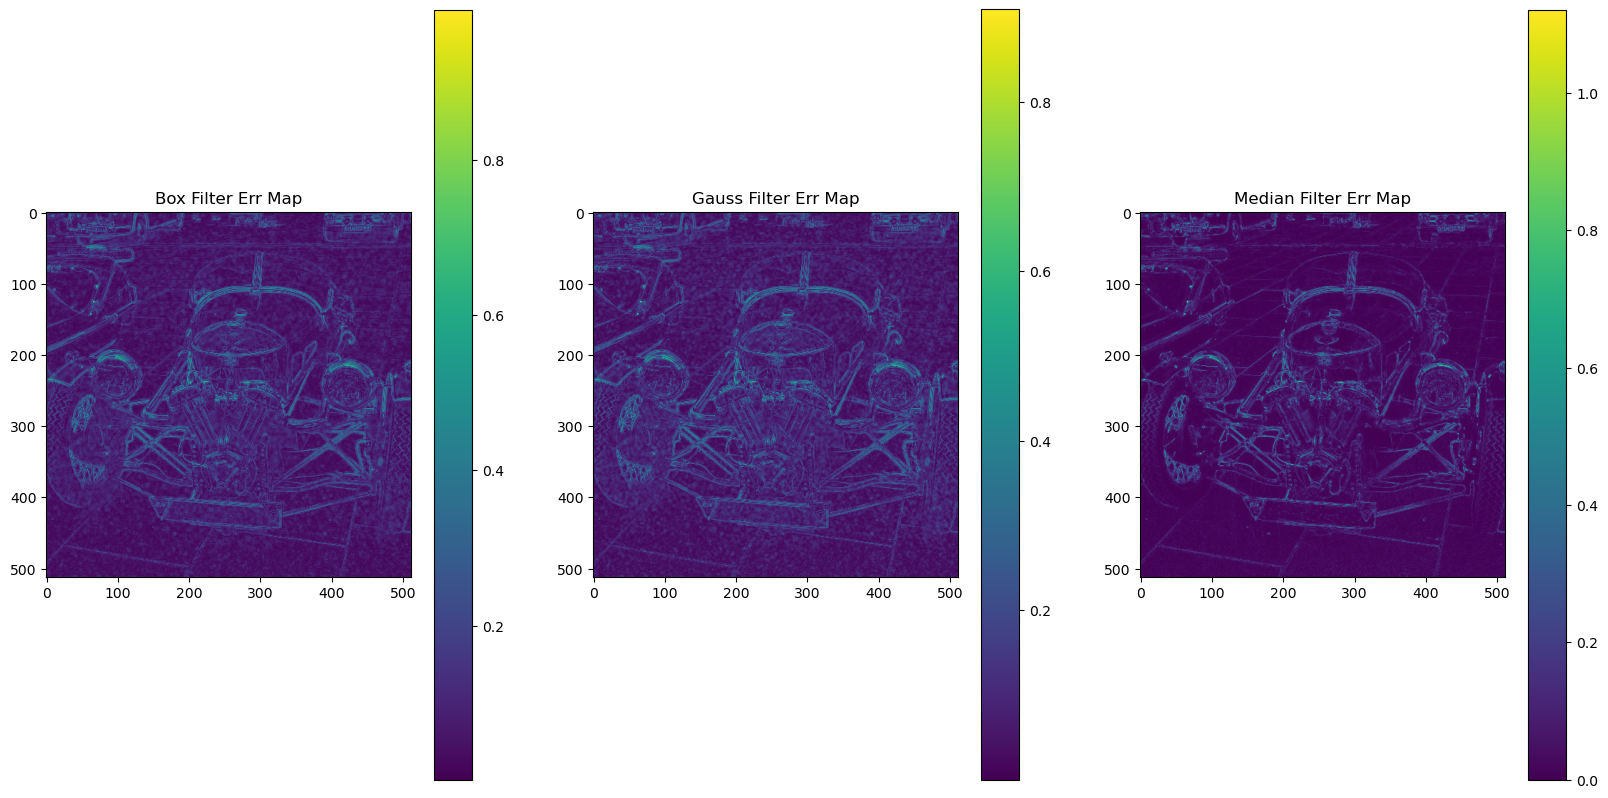

In [13]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import cv2 

image = cv2.imread("../car.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_float = image_rgb.astype(np.float32) / 255.0

def mean_squared_error(image, gt_image):
    diff = image - gt_image
    return np.mean(diff * diff)

def make_error_map(image, gt_image):
    sq_diff = 0
    for c in range(3):
        diff = image[...,c] - gt_image[...,c]
        sq_diff += diff * diff
    return np.sqrt(sq_diff)

def apply_salt_pepper_noise(image, probability):
    """
    Randomly flips bits in a given input image with the specified probability. 
    The image used as input should be a 3-channel 8-bit image.
    """
    salt_pepper_image = image.copy()
    for c in range(3):
        for bit in range(8):
            mask = (np.random.uniform(low=0, high=1, size=image.shape[:2]) < probability).astype(np.uint8)
            mask[mask != 0] = 1 << bit
            salt_pepper_image[:,:,c] ^= mask
    return salt_pepper_image

# Apply the noise, then convert to floating-point.
salt_pepper_image = apply_salt_pepper_noise(image_rgb, 0.05).astype(np.float32) / 255.0

# This function applies a 5x5 box filter to the input:
box_filtered = cv2.blur(salt_pepper_image, ksize=[5,5])
# This applies a gaussian blur (size 5x5, standard deviation 2):
gauss_blurred = cv2.GaussianBlur(salt_pepper_image, ksize=[5,5], sigmaX=2, sigmaY=2)
# This applies a median filter (5x5):
median_filtered = cv2.medianBlur(salt_pepper_image, ksize=5)

box_mse = mean_squared_error(box_filtered, image_float)
gauss_mse = mean_squared_error(gauss_blurred, image_float)
median_mse = mean_squared_error(median_filtered, image_float)

# Show errors and output images
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(box_filtered)
plt.title("Box Filter MSE %f" % box_mse)
plt.subplot(1,3,2)
plt.imshow(gauss_blurred)
plt.title("Gauss Filter MSE %f" % gauss_mse)
plt.subplot(1,3,3)
plt.imshow(median_filtered)
plt.title("Median Filter MSE %f" % median_mse)

#Show error maps.
plt.figure(figsize=[20,10])
plt.subplot(1,3,1)
plt.imshow(make_error_map(box_filtered, image_float))
plt.colorbar()
plt.title("Box Filter Err Map")
plt.subplot(1,3,2)
plt.imshow(make_error_map(gauss_blurred, image_float))
plt.colorbar()
plt.title("Gauss Filter Err Map")
plt.subplot(1,3,3)
plt.imshow(make_error_map(median_filtered, image_float))
plt.colorbar()
plt.title("Median Filter Err Map")